In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

# csv_path下のファイルをすべて取得
csv_path = 'graph_csv'
files = os.listdir(csv_path)
# csvファイルの中身をdataframeに格納
csv_data = pd.DataFrame()
for file in files:
    if file.endswith('.csv'):
        data = pd.read_csv(os.path.join(csv_path, file))
        csv_data = pd.concat([csv_data, data])

csv_data = csv_data[csv_data['Step'] <= 1000]
csv_data = csv_data.drop('Step', axis=1)
csv_data = csv_data.loc[:,[not '__' in column for column in csv_data.columns]] # __が含まれる列を削除
csv_data.columns = [column.split(' ')[0] for column in csv_data.columns] # スペース以降を削除
csv_data.head()

,dreamerv3/medium/ih_15/room0/rotation/run4,dreamerv3/medium/ih_15/room0/rotation/run3,dreamerv3/medium/ih_15/room0/rotation/run2,dreamerv3/medium/ih_15/room0/rotation/run1,dreamerv3/medium/ih_15/room0/rotation/run0,dreamerv3/medium/ih_15/room0/2sounds/run4,dreamerv3/medium/ih_15/room0/2sounds/run3,dreamerv3/medium/ih_15/room0/2sounds/run2,dreamerv3/medium/ih_15/room0/2sounds/run1,dreamerv3/medium/ih_15/room0/2sounds/run0,...,dreamerv3/medium/ih_15/room0/alt_blue/run4,dreamerv3/medium/ih_15/room0/alt_blue/run3,dreamerv3/medium/ih_15/room0/alt_blue/run2,dreamerv3/medium/ih_15/room0/alt_blue/run1,dreamerv3/medium/ih_15/room0/alt_blue/run0,sac/run4,sac/run3,sac/run2,sac/run1,sac/run0
0,-6.837595,-65.681557,-50.105673,-48.295919,-68.841353,-97.547239,-81.963786,-55.866200,-86.582424,-82.871446,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-66.627045,-38.549583,-69.875033,-46.715090,-70.112034,-96.393151,-90.587641,-90.075522,-47.804200,-70.839382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-50.353152,-75.915124,-84.689434,-35.541646,-70.389022,-78.251170,-83.073869,-82.496608,-92.988385,-87.377369,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-58.370758,-70.535693,-75.158513,-60.888394,-78.084805,1.539628,-85.083515,-81.042698,-52.072384,-67.338959,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-71.833318,-72.206457,-74.126082,-49.843788,-79.219442,-66.726862,-85.001659,-76.349994,-45.037932,-83.586258,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


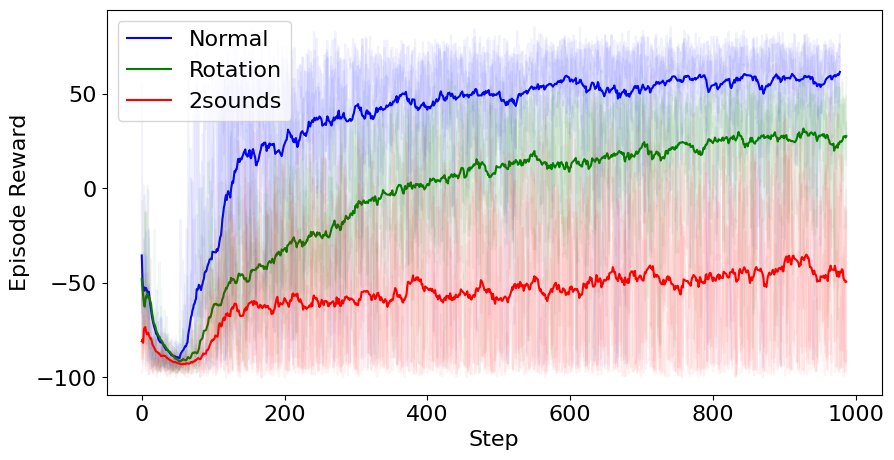

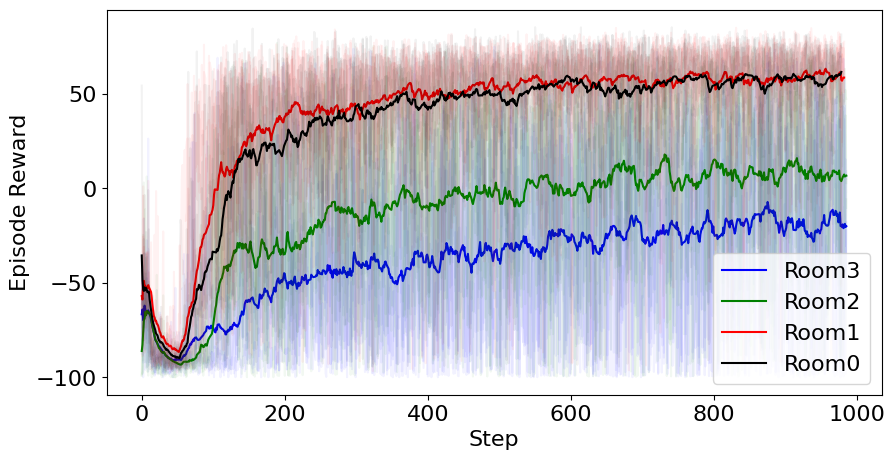

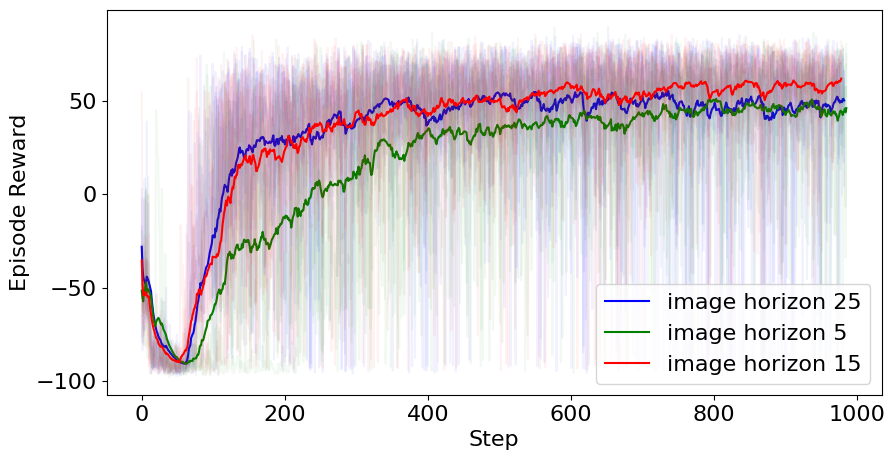

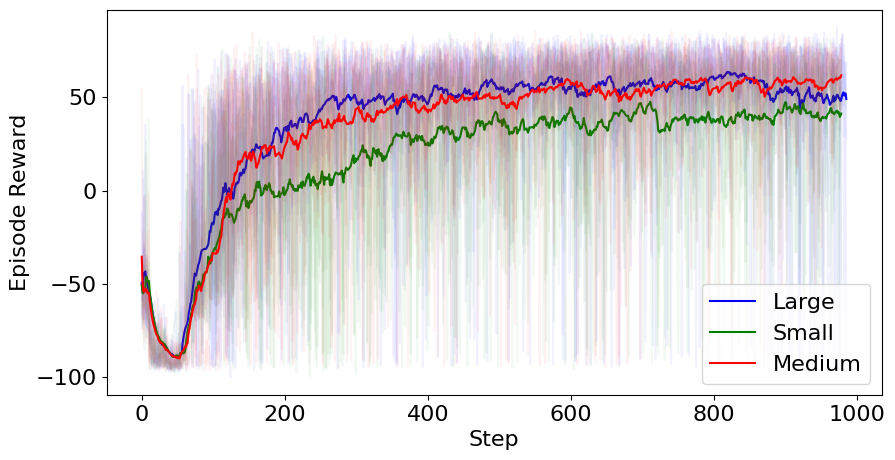

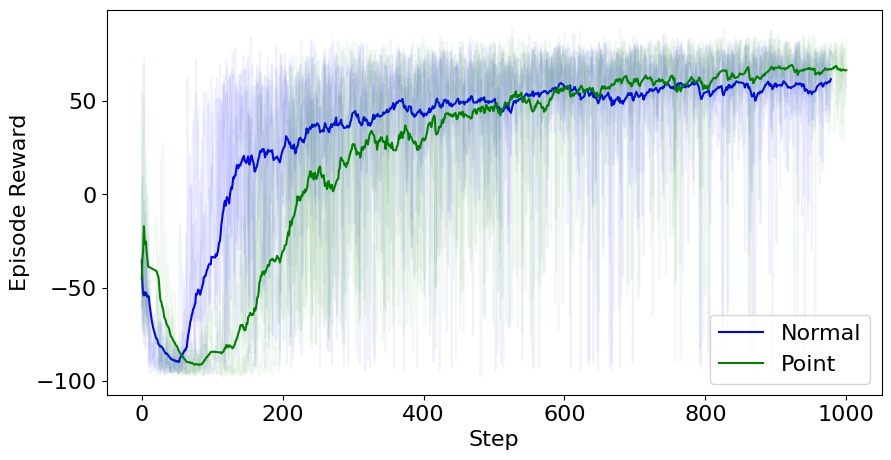

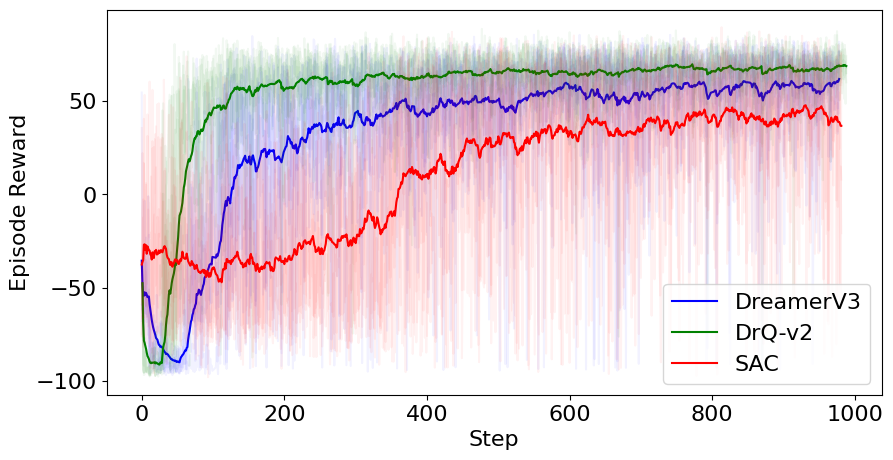

In [2]:
key_dict1 = {
    'Normal': 'medium/ih_15/room0',
    'Rotation': 'medium/ih_15/room0/rotation',
    '2sounds': 'medium/ih_15/room0/2sounds'
}
key_dict2 = {
    'Room3': 'medium/ih_15/room3',
    'Room2': 'medium/ih_15/room2',
    'Room1': 'medium/ih_15/room1',
    'Room0': 'medium/ih_15/room0'
}
key_dict3 = {
    'image horizon 25': 'medium/ih_25/room0',
    'image horizon 5': 'medium/ih_5/room0',
    'image horizon 15': 'medium/ih_15/room0'
}
key_dict4 = {
    'Large': 'large/ih_15/room0',
    'Small': 'small/ih_15/room0',
    'Medium': 'medium/ih_15/room0'
}
key_dict5 = {
    'Normal': 'medium/ih_15/room0',
    'Point': 'medium/ih_15/room0/alt_blue'
}
key_dict6 = {
    'DreamerV3': 'medium/ih_15/room0',
    'DrQ-v2': 'drqv2',
    'SAC': 'sac'
}
# key_dictとsmoothingの値を指定して，グラフを描画する
def draw_graph(key_dict, smoothing):
    color_list = ['b', 'g', 'r', 'k', 'w']
    # 図を描画
    plt.figure(figsize=(10, 5))
    plt.xlabel('Step')
    plt.ylabel('Episode Reward')
    count = 0
    for key, value in key_dict.items():
        data = csv_data.loc[:,[value in column for column in csv_data.columns]]
        if ('rotation' not in value) and ('2sounds' not in value) and ('alt_blue' not in value):
            data = data.loc[:,[not 'rotation' in column for column in data.columns]]
            data = data.loc[:,[not '2sounds' in column for column in data.columns]]
            data = data.loc[:,[not 'alt_blue' in column for column in data.columns]]
        data = data.dropna()
        # dataをプロット
        for column in data.columns:
            plt.plot(data[column], alpha=0.05, color=color_list[count])
        data = data.mean(axis=1)
        data = data.ewm(span=smoothing).mean()
        plt.plot(data, label=key, color=color_list[count])
        count += 1
    plt.legend()
    plt.show()

plt.rcParams.update({'font.size': 16})
smoothing = 20
draw_graph(key_dict1, smoothing)
draw_graph(key_dict2, smoothing)
draw_graph(key_dict3, smoothing)
draw_graph(key_dict4, smoothing)
draw_graph(key_dict5, smoothing)
draw_graph(key_dict6, smoothing)